# Project 6 - Exploratory Data Analysis

## Get started

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv(Path.cwd()/'notes.csv')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


<div class='alert alert-block alert-info'> The dataset is labelled and contains the following information:

- The length of the ticket (in mm);
- The height of the ticket (measured on the left side, in mm);
- The height of the ticket (measured on the right side, in mm);
- The margin between the top edge of the banknote and the image thereof (in mm);
- The margin between the lower edge of the banknote and the image thereof (in mm);
- The diagonal of the banknote (in mm).
- label column type boolean </div>

## Data Description

Let's start by having a look on the structure of the dataset and the global quality.

In [4]:
df.shape

(170, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [6]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [7]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div class='alert alert-block alert-info'>  Nothing looks odd: none missing values, none extremes or atypical values. The data format is good.    </div>

## Univariate Analysis

### Distribution

In [8]:
tmp = df.iloc[:,1:] # we remove the boolean column for the distribution

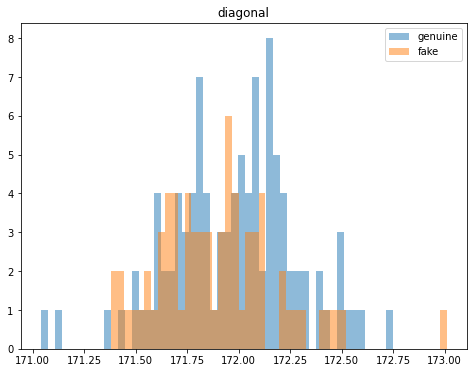

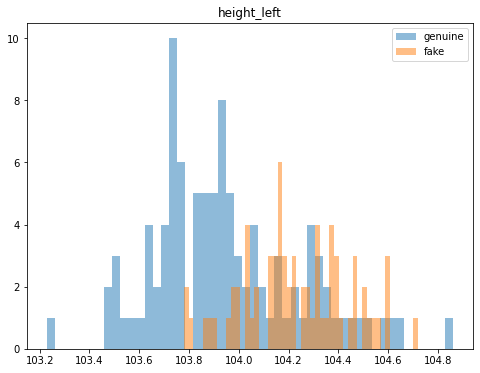

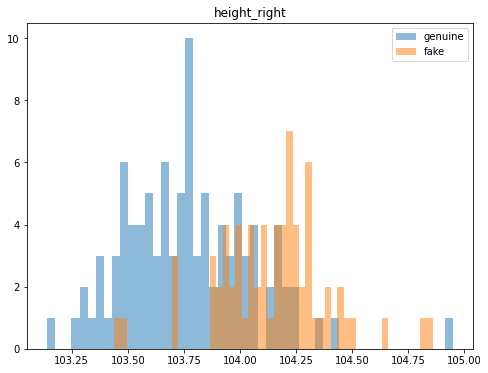

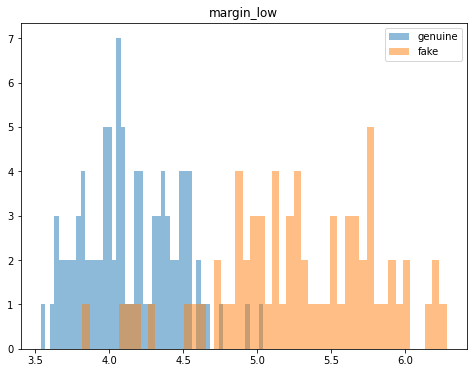

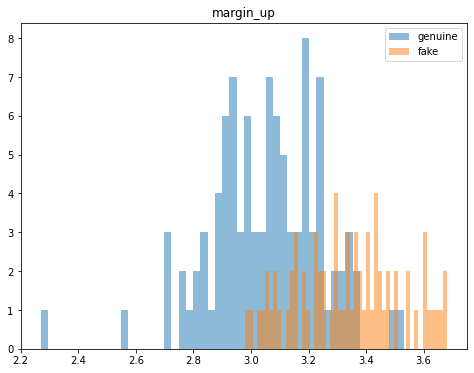

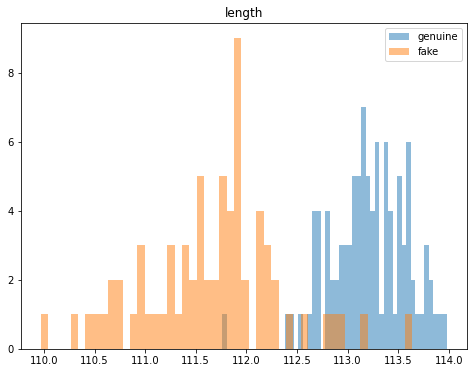

In [9]:
# Check the Distribution for each columns
for i in tmp.columns:
    plt.figure(figsize=(8,6))
    tmp1 = df[df['is_genuine'] == True]
    tmp2 = df[df['is_genuine'] == False]
    plt.hist(tmp1[i], bins=50, alpha=0.5, label="genuine")
    plt.hist(tmp2[i], bins=50, alpha=0.5, label="fake")
    plt.title(i)
    plt.legend(loc='upper right')

<div class='alert alert-block alert-info'> 
We can see that the distributions for each variables look slightly different, whether or not, the note is genuine. In particular, for length, margin up/low and height. This observation is not that strong for diagonal. Perhaps, we will drop this variable later depending on the results of the ACP.

- This is interesting for our case, as we want to use these variables to classify the notes in 2 groups: genuine / fake. 
- All in all, each variables seem to be normally distribute. However, some of them (fx. diagonal) are skewed most likely due to extreme values. Let's use boxplots to see whether or not these values can be considered as outliers. </div>

### Box-plot

/Users/aureliegiraud/.virtualenvs/env3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


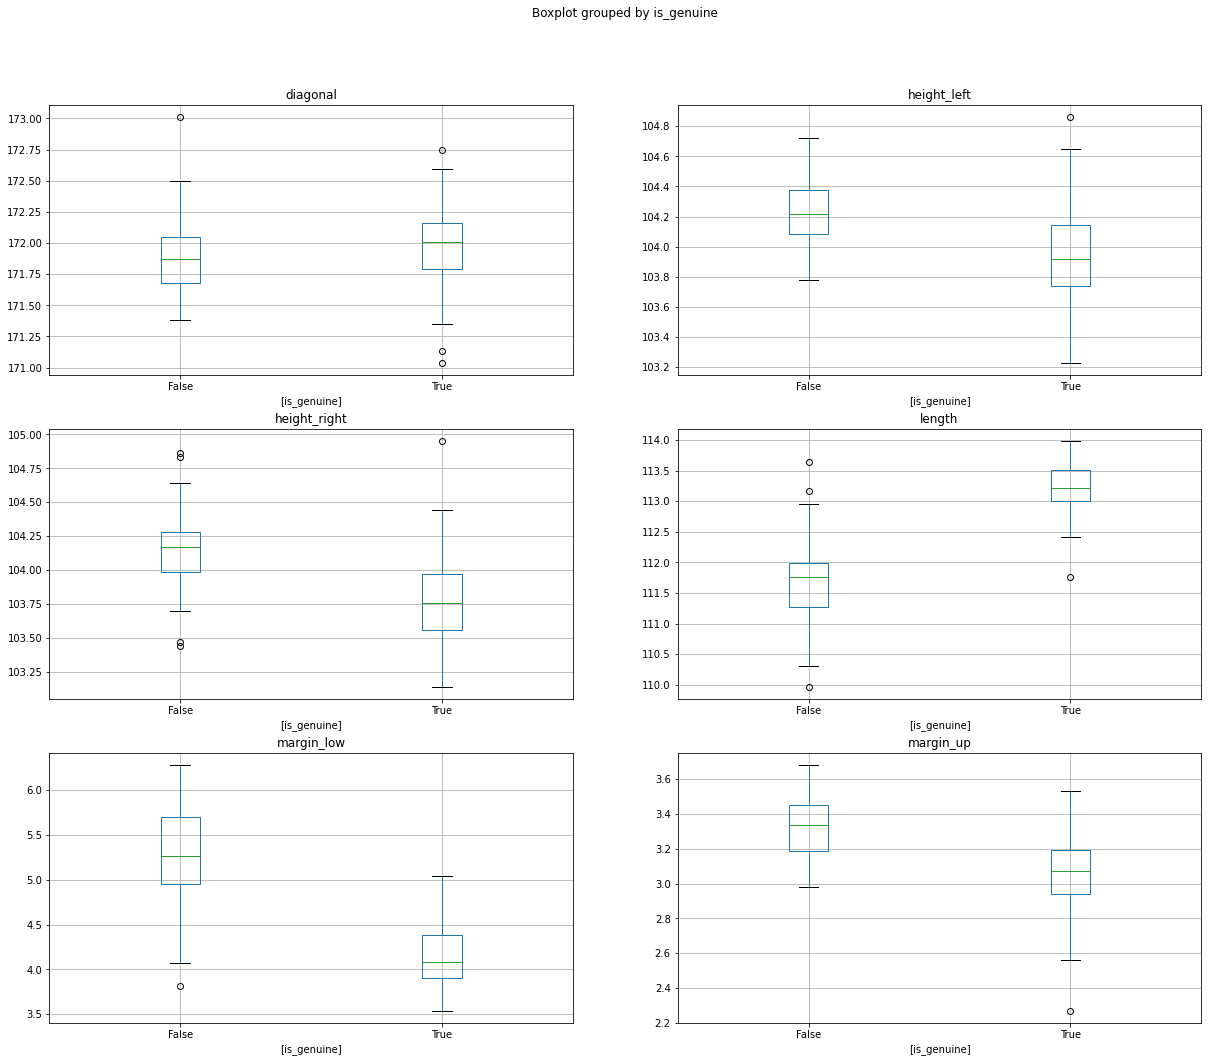

In [10]:
# Create boxplots to visualize the potential outliers and the data distribution (another way)
fig, ax_new = plt.subplots(3,2, sharey=False,figsize=(20,17))
df.boxplot(by="is_genuine",ax=ax_new)
plt.show()

<div class='alert alert-block alert-info'> We can detect various outliers (extreme values) from the box plots. We can check their values with the function matplotlib.cbook.boxplot_stats.
    
- The function is documented here: https://matplotlib.org/api/cbook_api.html

</div>

### Outliers

In [11]:
for i in df.columns:
    tmp1 = df[df['is_genuine'] == False]
    tmp2 = df[df['is_genuine'] == True]
    print(i,':', 'Fake',len(boxplot_stats(tmp1[i]).pop(0)['fliers']),'=',boxplot_stats(tmp1[i]).pop(0)['fliers'],
          '/','Genuine',len(boxplot_stats(tmp2[i]).pop(0)['fliers']),'=',boxplot_stats(tmp2[i]).pop(0)['fliers'])

is_genuine : Fake 0 = [] / Genuine 0 = []
diagonal : Fake 1 = [173.01] / Genuine 3 = [171.13 171.04 172.75]
height_left : Fake 0 = [] / Genuine 1 = [104.86]
height_right : Fake 4 = [103.47 103.44 104.83 104.86] / Genuine 1 = [104.95]
margin_low : Fake 1 = [3.82] / Genuine 0 = []
margin_up : Fake 0 = [] / Genuine 1 = [2.27]
length : Fake 3 = [109.97 113.64 113.17] / Genuine 1 = [111.76]


<div class = 'alert alert-block alert-info'>
At maximun there are 4 outliers per columns which is very few on 170 rows (2%). 
The question is: Can they affect the accuracy of the detection algorithm? 

Perhaps, we can run this projet with and without, and see the impact on the accuracy. 
Or, we can decide to drop them anyway.

- For that purpose, we can for example use the IQR scores and the following rule of thumb: anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. 

Others techniques to manage outliers involved for example log transformations, replacing by median values (and not the mean, which is affected by the outliers).
    </div>

In [12]:
# Create a function to remove outliers based on the IQR score
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_out

In [13]:
# Apply the function to remove outliers
df2 = df.groupby('is_genuine').apply(remove_outliers).reset_index(drop=True)

/Users/aureliegiraud/.virtualenvs/env3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


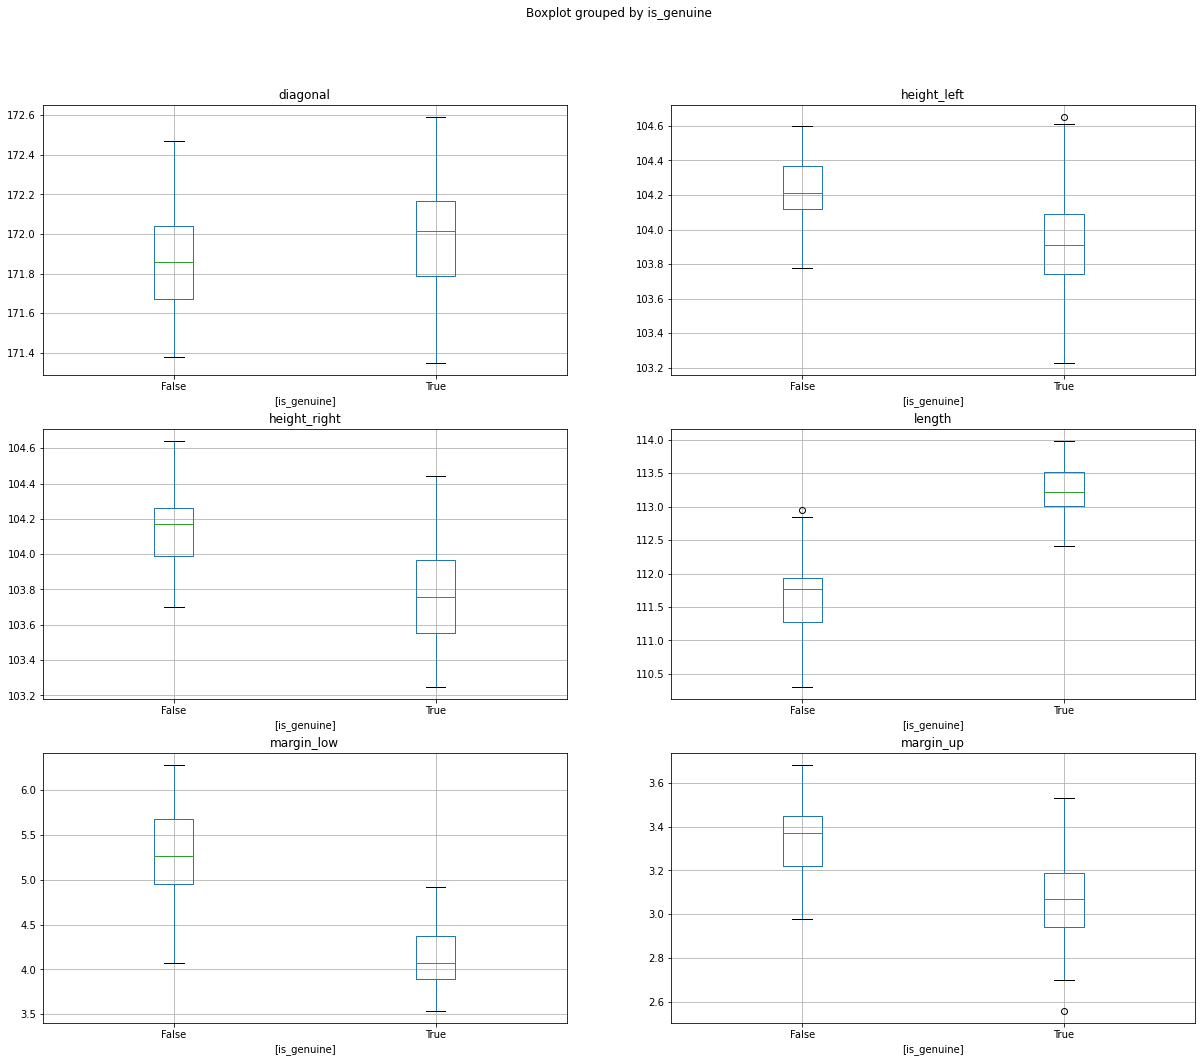

In [15]:
# Let's check the effect of the function
fig, ax_new = plt.subplots(3,2, sharey=False,figsize=(20,17))
df2.boxplot(by="is_genuine",ax=ax_new)
plt.show()

<div class='alert alert-block alert-info'> We can see that the function worked well at removing the main outliers. 
Some outliers are remaining as they are very close to the Q3. There is no reason to delete them.

We have now 2 datasets:

- df = with outliers
- df2 = without outliers
    
We are going to apply the following steps and test the final model on both dataset, to see whether or not the cleaning improve the accuracy of the model.
    
</div>

## Bivariate Analysis

In the previous part, we visualized the structure and distribution within a single column. 
In this part, we'll expand the exploration by visualizing the relationships between two variables at a time to understand:
- How variables interact with one another?
- Does an increase in one variable correlate with an increase/decrease in another? 

In [16]:
# Drop the boolean column from the analysis
tmp = df.iloc[:,1:] 
tmp2 = df2.iloc[:,1:] 

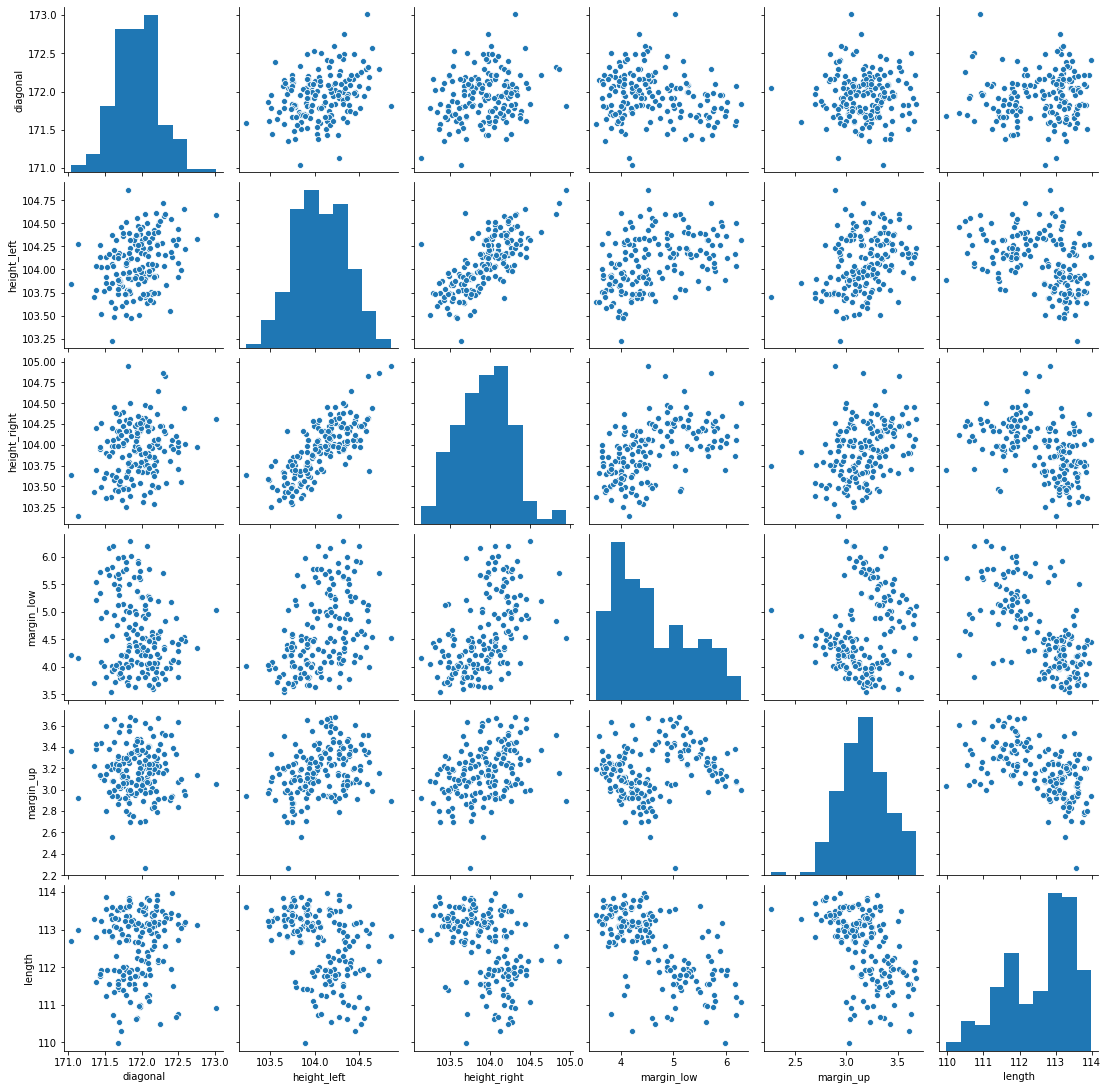

In [17]:
# We can visualize the correlation & distribution of the variables with Seaborn Pairplot
# on the dataset with outliers
sns.pairplot(tmp)

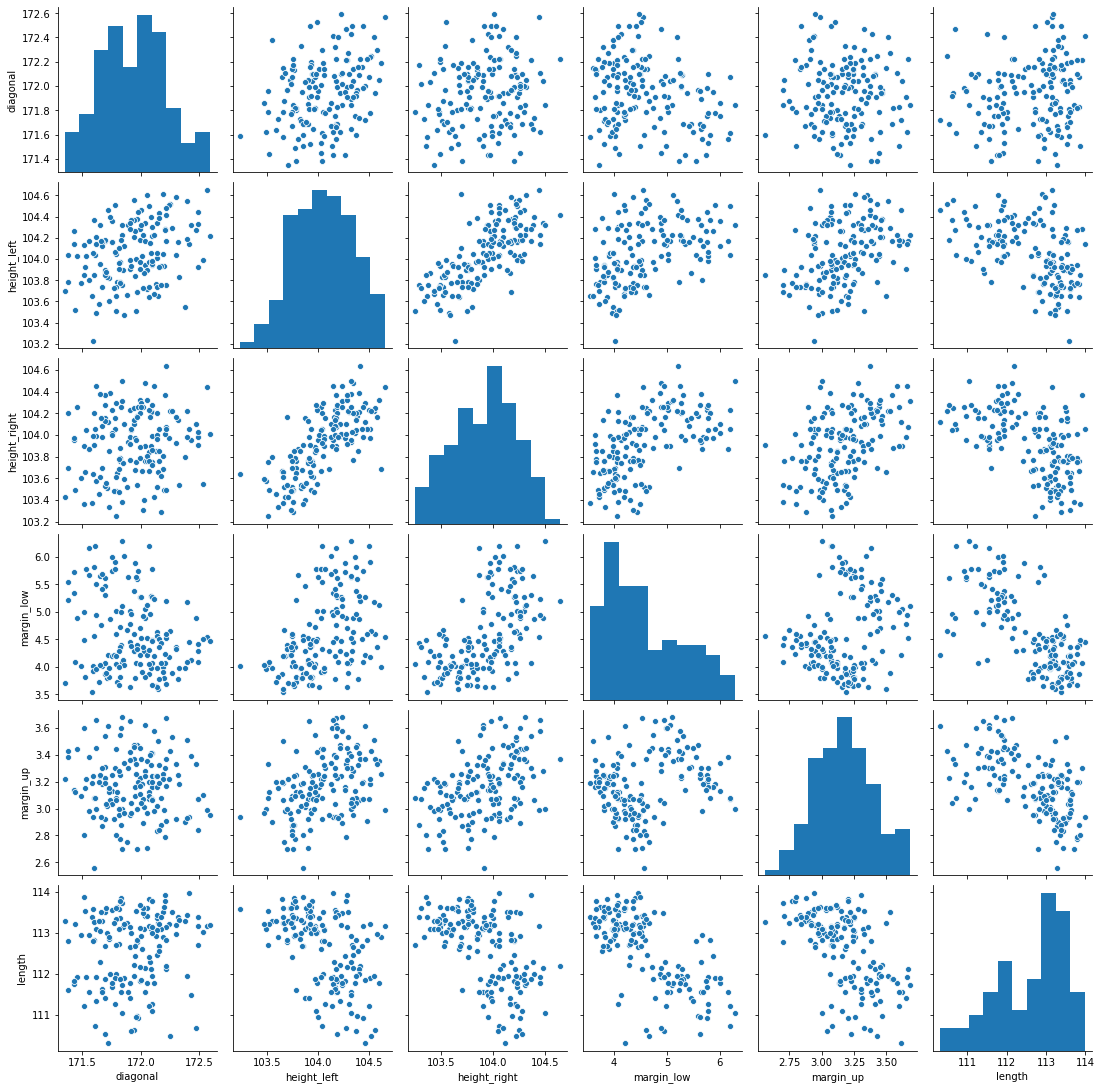

In [18]:
# We can visualize the correlation & distribution of the variables with Seaborn Pairplot
# without outliers
sns.pairplot(tmp2)

<div class='alert alert-block alert-info'>
We can make the following observations on both dataset:

- height_left & height_right:
    - seem to be correlated to each other
    - seem to be positively correlated with margin_up and margin_low 
    - seem to be negatively correlated to length.
    
    
- margin_low & margin_up:
    - seem to be negatively correlated to length
    - seem to be positively correlated with height (both left and right)
    - seem not to be correlated to each other
    
    
These observations are relevant and might be visible likewise with the PCA.

</div>

In [20]:
# Export the output for the next step (PCA)
df2.to_csv(Path.cwd()/'dataset_cleaned.csv')
df.to_csv(Path.cwd()/'dataset.csv')